## Model Creation and Training

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
# Loading the data
data = pd.read_csv("datasets/feature_selected_data2.csv", index_col=0)

In [3]:
print(data.shape)
data.head()

(129778, 29)


,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,number_of_percent_in_url,domain_length,number_of_dots_in_domain,number_of_hyphens_in_domain,having_special_characters_in_domain,number_of_special_characters_in_domain,having_digits_in_domain,number_of_digits_in_domain,having_repeated_digits_in_domain,number_of_subdomains,average_subdomain_length,number_of_special_characters_in_subdomain,having_digits_in_subdomain,number_of_digits_in_subdomain,path_length,having_query,entropy_of_url,entropy_of_domain,Type
0,37,2,0,0,8,0,0,5,0,0,0,12,2,0,0,0,0,0,0,2,3.0,3,0,0,3,0,4.010412,2.751629,0
1,70,5,0,0,12,0,0,6,0,0,0,26,5,0,0,0,0,0,0,2,3.0,3,0,0,4,0,4.089470,3.532573,1
2,42,2,0,6,8,0,0,3,1,1,0,21,2,0,0,0,1,6,0,2,7.0,3,0,0,1,1,4.386016,3.344698,0
3,46,2,0,0,7,0,0,4,0,0,0,15,2,0,0,0,0,0,0,2,3.0,3,0,0,2,0,4.221947,3.189898,0
4,51,3,0,0,9,0,0,5,0,0,0,16,3,0,0,0,0,0,0,2,3.0,3,0,0,3,0,4.103538,2.952820,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
# Splitting the dataset to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [9]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (103822, 28) (103822,)
Test data shape: (25956, 28) (25956,)


In [10]:
classifier = RandomForestClassifier(n_estimators=20, random_state=42)

In [11]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

## Model Evaluation

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the encoder file
# with open("encoders/label_encoder.pkl", "rb") as file:
#     encoder = pickle.load(file)

In [13]:
# Getting the model's predictions on the test set
pred = classifier.predict(X_test)

In [15]:
print(classification_report(y_test, pred))
print("\nModel Accuracy: {:.4f}".format(accuracy_score(y_test, classifier.predict(X_test))))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     13354
           1       0.92      0.88      0.90     12602

    accuracy                           0.90     25956
   macro avg       0.90      0.90      0.90     25956
weighted avg       0.90      0.90      0.90     25956


Model Accuracy: 0.9020


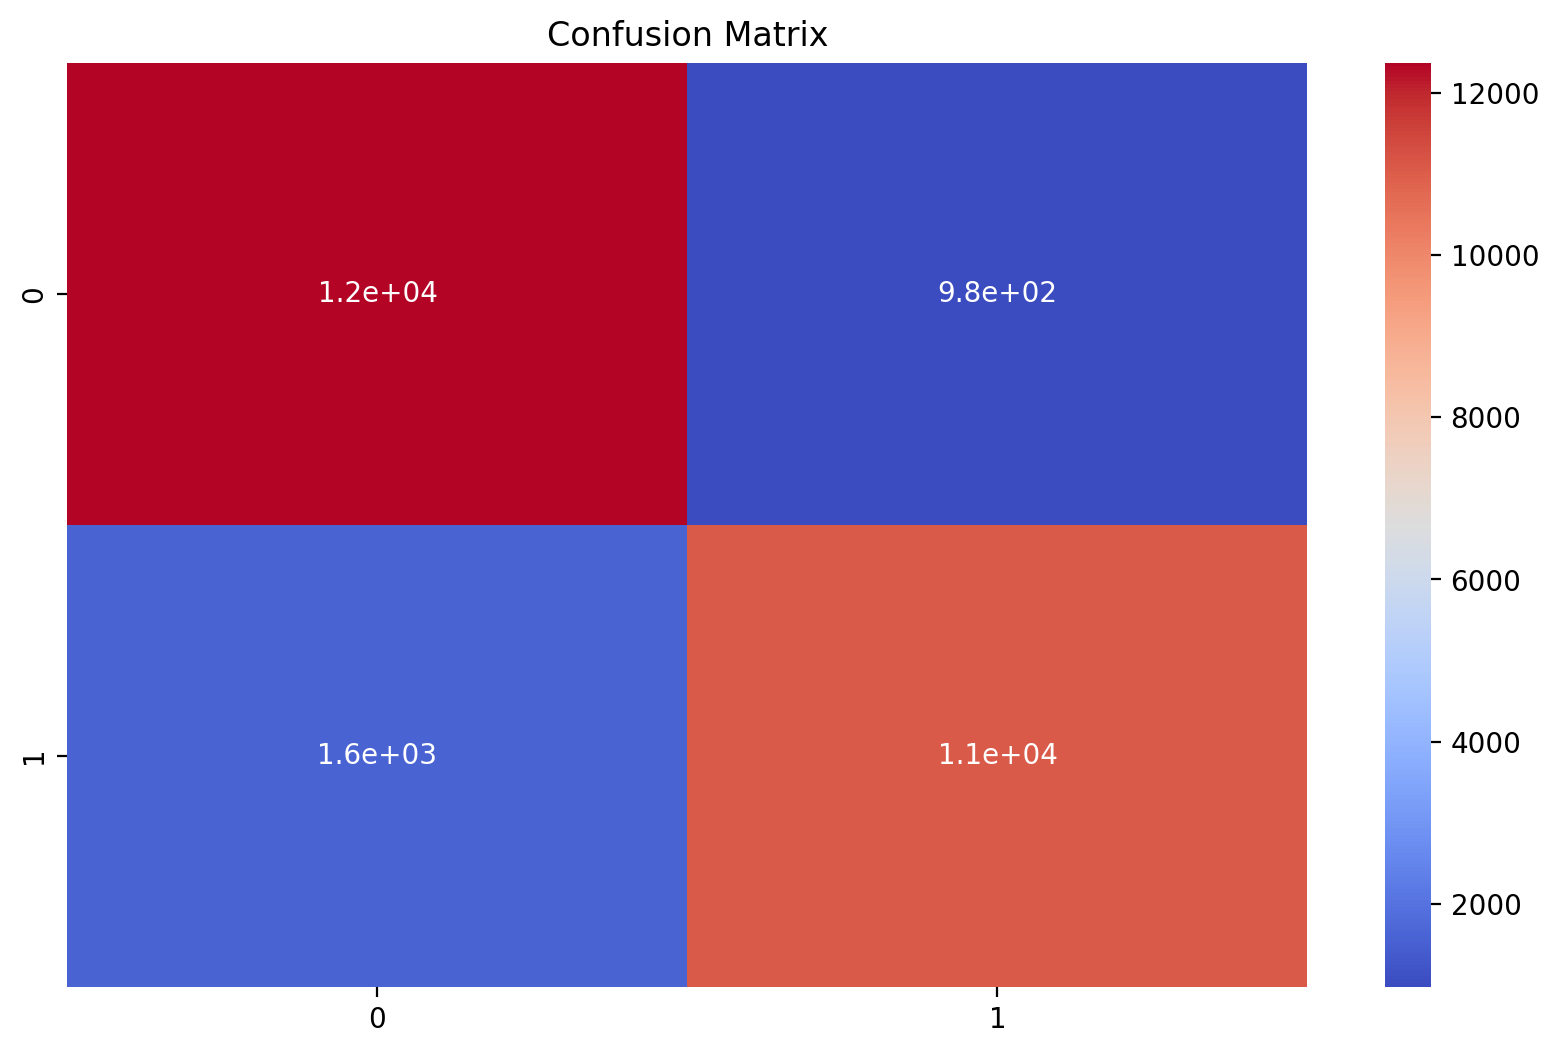

In [16]:
# Getting the confusion matrix for the model's performance
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(
    confusion_matrix(y_test, pred),
    annot=True,
    # xticklabels=encoder.classes_,
    # yticklabels=encoder.classes_,
    cmap="coolwarm"
)
plt.title("Confusion Matrix")
# plt.savefig("./plots/final_classifier_confusion_matrix")
plt.show()

In [17]:
# Saving the model
with open("models/random_forest_classifier_model2.pkl", "wb") as file:
    pickle.dump(classifier, file)

In [18]:
### Using a Logistic Regresssion Classifier
from sklearn.linear_model import LogisticRegression
# Initializing the Logistic Regression Classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
# Fitting the Logistic Regression Classifier
logistic_classifier.fit(X_train, y_train)
# Getting the model's predictions on the test set
logistic_pred = logistic_classifier.predict(X_test)
print(classification_report(y_test, logistic_pred))
print("\nLogistic Regression Model Accuracy: {:.4f}".format(accuracy_score(y_test, logistic_pred)))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     13354
           1       0.84      0.72      0.78     12602

    accuracy                           0.80     25956
   macro avg       0.80      0.80      0.80     25956
weighted avg       0.80      0.80      0.80     25956


Logistic Regression Model Accuracy: 0.7985


/home/d3ju/.conda/envs/devspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
with open("models/logistic_reg_model2.pkl", "wb") as f:
    pickle.dump(logistic_classifier, f)

In [20]:
# Creating an ensemble model using both classifiers
from sklearn.ensemble import VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('rf', classifier),
        ('logistic', logistic_classifier)
    ],
    voting='soft'
)
# Fitting the ensemble classifier
ensemble_classifier.fit(X_train, y_train)
# Getting the ensemble model's predictions on the test set
ensemble_pred = ensemble_classifier.predict(X_test)
print(classification_report(y_test, ensemble_pred))
print("\nEnsemble Model Accuracy: {:.4f}".format(accuracy_score(y_test, ensemble_pred)))
# Saving the ensemble model
with open("models/ensemble_classifier_model2.pkl", "wb") as file:
    pickle.dump(ensemble_classifier, file)

/home/d3ju/.conda/envs/devspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.87      0.92      0.89     13354
           1       0.91      0.85      0.88     12602

    accuracy                           0.89     25956
   macro avg       0.89      0.89      0.89     25956
weighted avg       0.89      0.89      0.89     25956


Ensemble Model Accuracy: 0.8877
